In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path = '/content/drive/MyDrive/Advertising.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['TV','Radio','Newspaper']] = scaler.fit_transform(df[['TV','Radio','Newspaper']])
from sklearn.model_selection import train_test_split
sale = 42
X = df.drop(['Sales'], axis=1)
y = df['Sales']

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=sale)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_true=y_test, y_pred=y_pred))
print(mean_squared_error(y_true=y_test, y_pred=y_pred))

1.4650601050102914
3.1990044685888908


In [7]:
difference = pd.DataFrame({
    'fixed values' : y_test,
    'predicted values' : y_pred,
})

difference['difference'] = difference['fixed values'] - difference['predicted values']
difference.head()

,fixed values,predicted values,difference
95,16.9,16.412277,0.487723
15,22.4,20.843193,1.556807
30,21.4,21.511869,-0.111869
158,7.3,10.653100,-3.353100
128,24.7,22.124058,2.575942


In [8]:
difference.shape

(40, 3)

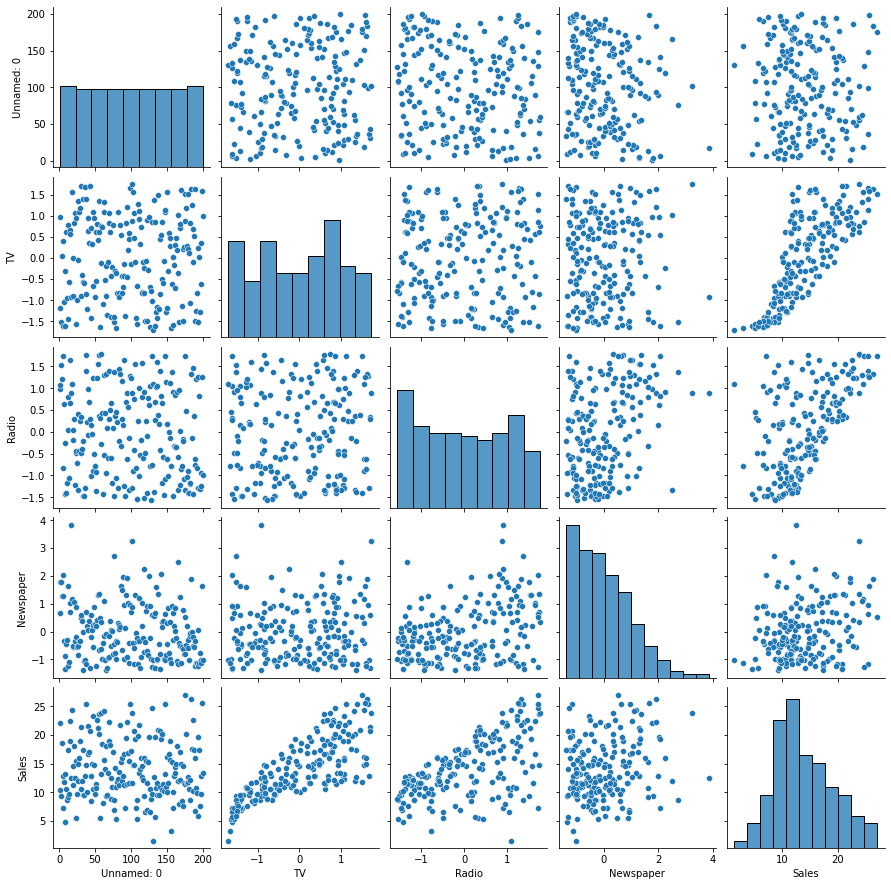

In [9]:
sns.pairplot(df)
plt.show()

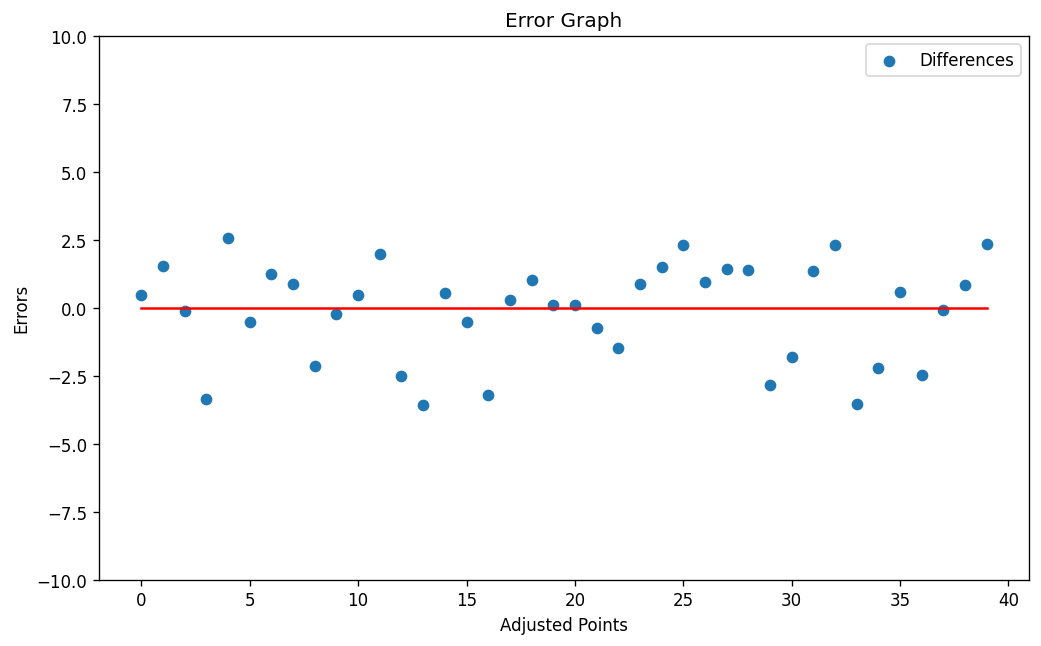

In [13]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='k')
f = range(0,40)
k = [0 for i in range(0,40)]
plt.scatter( f, difference.difference[:], label = 'Differences')
plt.plot( f, k , color = 'red')
plt.xlabel('Adjusted Points')
plt.ylabel('Errors')
plt.title('Error Graph')
plt.ylim(-10, 10)
plt.legend()

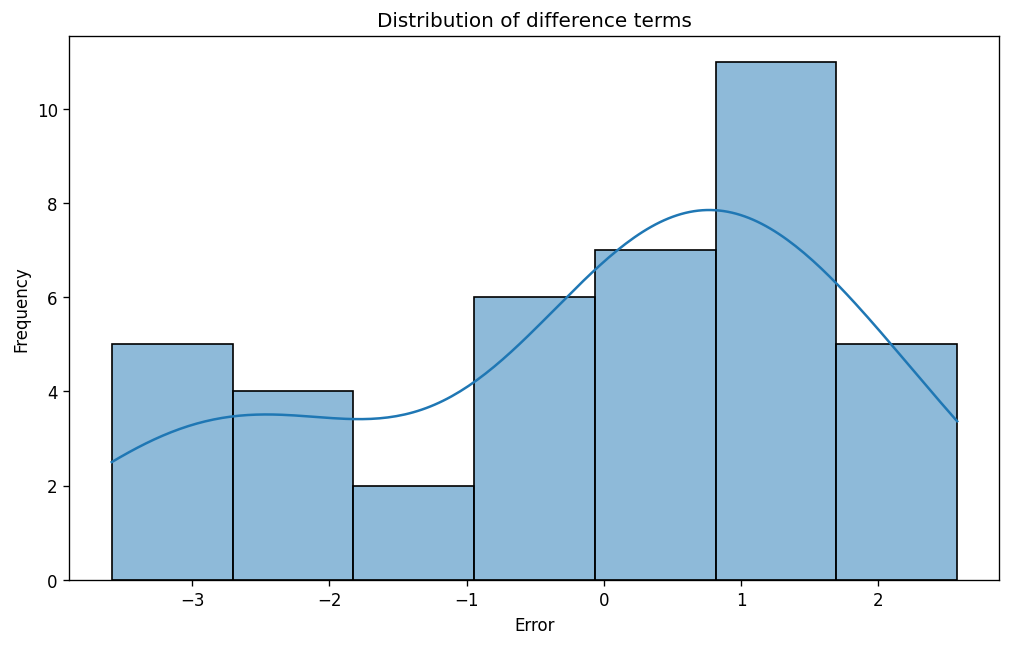

In [14]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
sns.histplot(difference.difference, kde=True)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of difference terms')
plt.show()

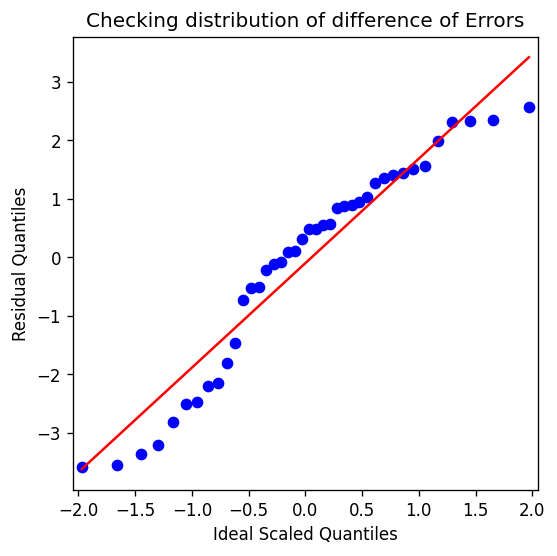

In [16]:
from statsmodels.graphics.gofplots import qqplot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(difference.difference, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of difference of Errors')
plt.show()

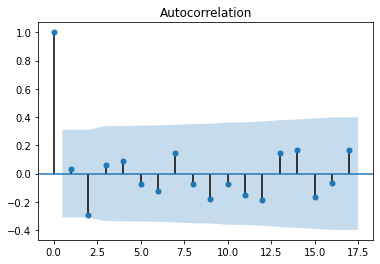

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(difference.difference)
plt.show()

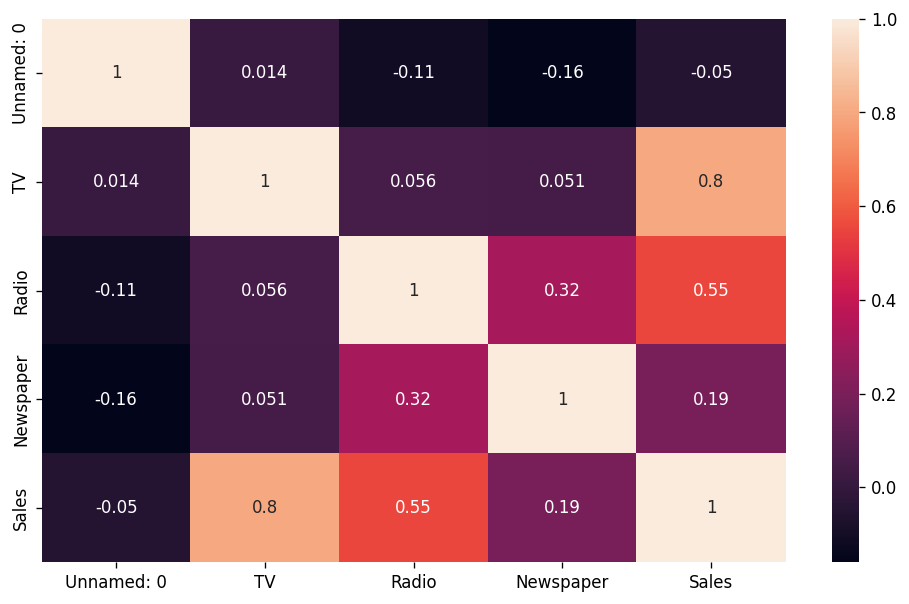

In [19]:
plt.figure(figsize=(10, 6), dpi=120)
sns.heatmap(df.corr(method='spearman'), annot = True)
plt.show()

In [20]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print(mean_absolute_error(y_true=y_test, y_pred=y_pred_dt))
print(mean_squared_error(y_true=y_test, y_pred=y_pred_dt))

1.0625
1.9122500000000007
